In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

!pip install azure-storage-blob

In [2]:
from azure.storage.blob import BlobServiceClient
import pandas as pd

# Set up your connection to Azure Blob Storage
connection_string = "DefaultEndpointsProtocol=https;AccountName=customersegmen1708469752;AccountKey=ZGRp2+BdXW5yBrR9ap++r3Sg0clIsaXWQQO85/3CeDS9fiZ1MCy5wdgzlyskK2gk1FhJTYD91YUT+AStb0BVdw==;EndpointSuffix=core.windows.net"
container_name = "datasets"
blob_name = "Mall_Customers.csv"

# Connect to the blob storage
blob_service_client = BlobServiceClient.from_connection_string(connection_string)
blob_client = blob_service_client.get_blob_client(container=container_name, blob=blob_name)

# Download the dataset
with open(blob_name, "wb") as download_file:
    download_file.write(blob_client.download_blob().readall())

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(blob_name)



In [3]:
# View the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Get summary statistics
print(df.describe())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000  

In [4]:
data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


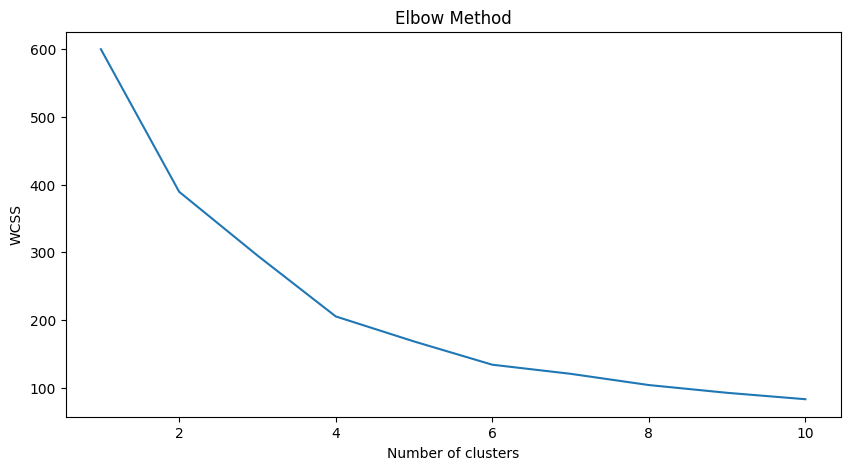

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [7]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df['Cluster'] = clusters


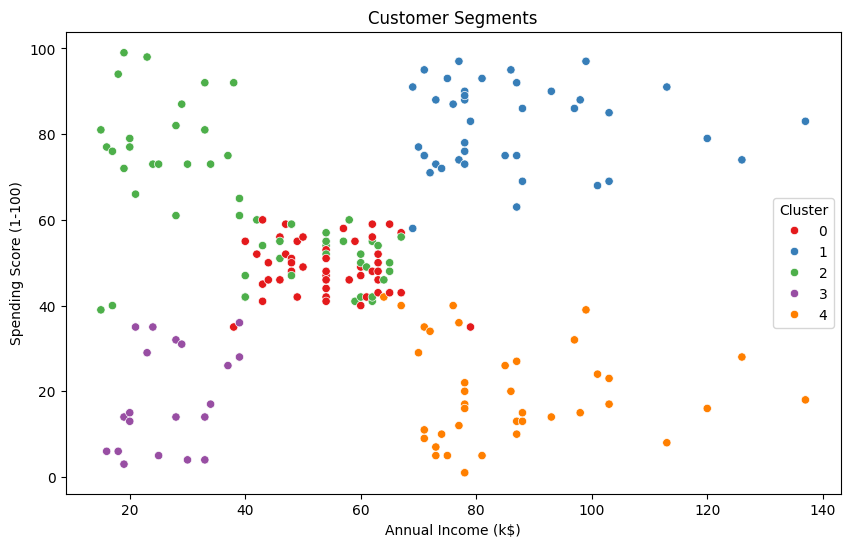

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', data=df)
plt.title('Customer Segments')
plt.show()


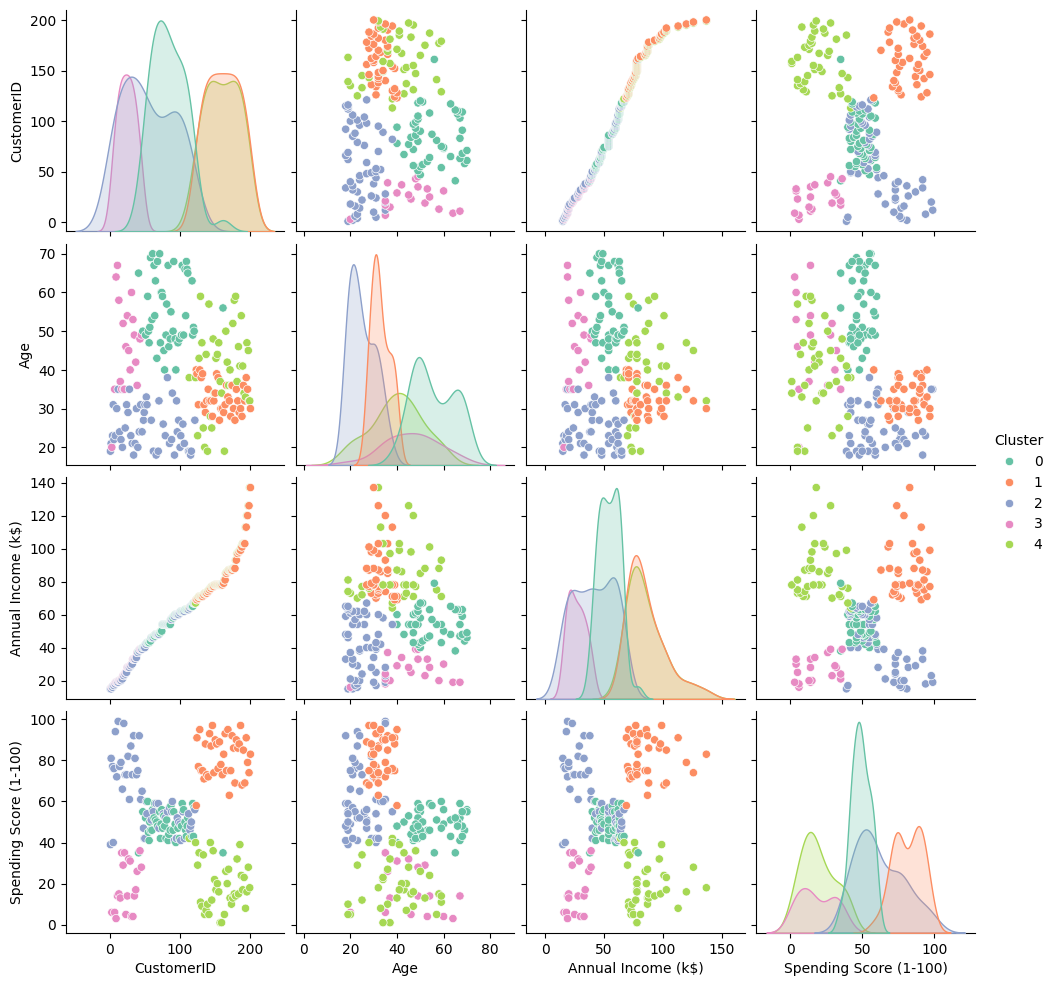

In [9]:
sns.pairplot(df, hue='Cluster', palette='Set2')
plt.show()


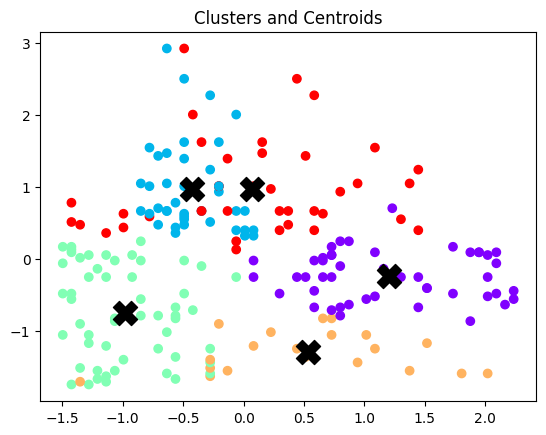

In [10]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', marker='X')
plt.title('Clusters and Centroids')
plt.show()


In [11]:
df.to_csv('clustered_customers.csv')
